MSE: 6.492439629880387


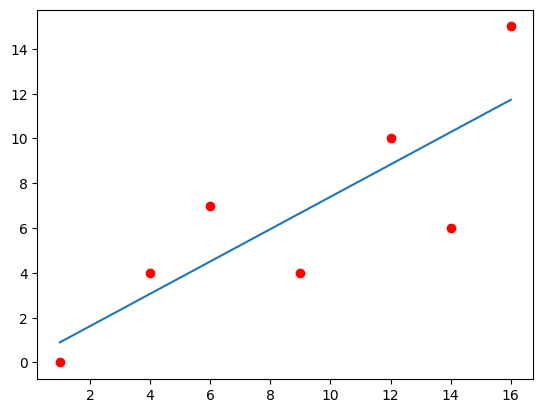

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.array([1, 4, 6, 9, 12, 14, 16]).reshape(-1, 1)
y = [0, 4, 7, 4, 10, 6, 15]
model = LinearRegression()

model.fit(x, y)
predict_y = model.predict(x)

print(f"MSE: {mean_squared_error(y, predict_y)}")

plt.scatter(x, y, color="r")
plt.plot(x, predict_y)
plt.show()

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

iris = datasets.load_iris()
x = iris.data[:, [0, 2]]
y = iris.target
model = KNeighborsClassifier(n_neighbors=7)

model.fit(x, y)

predict_y = model.predict(x)
accuracy = accuracy_score(y, predict_y)
precision = precision_score(y, predict_y, average="macro")
recall = recall_score(y, predict_y, average="macro")
f1 = f1_score(y, predict_y, average="macro")
cm = confusion_matrix(y, predict_y)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
print(f"Confusion matrix: {cm}")

Accuracy: 0.9666666666666667
Precision: 0.9667867146858743
Recall: 0.9666666666666667
F1: 0.9666633329999667
Confusion matrix: [[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


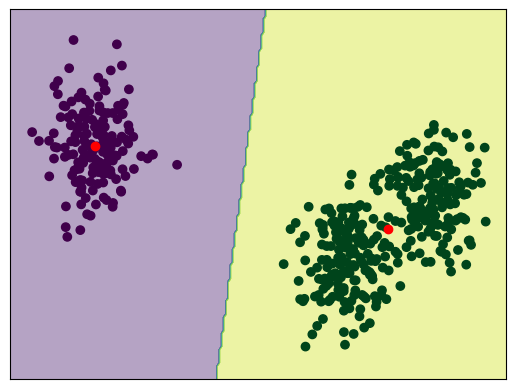

In [36]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x, y = make_blobs(n_samples=500)
model = KMeans(n_clusters=2)
predict_y = model.fit_predict(x)
min_x, max_x = x[:, 0].min() - 1, x[:, 0].max() + 1
min_y, max_y = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(min_x, max_x, 0.1), np.arange(min_y, max_y, 0.1))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.4)
plt.xticks([]), plt.yticks([])
plt.scatter(x[:, 0], x[:, 1], c=predict_y, cmap="PRGn")
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color="r")
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

iris = datasets.load_iris()
x = iris.data[:, [0, 2]]
y = iris.target
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=7)

model.fit(train_x, train_y)

predict_y = model.predict(test_x)
accuracy = accuracy_score(test_y, predict_y)
precision = precision_score(test_y, predict_y, average="macro")
recall = recall_score(test_y, predict_y, average="macro")
f1 = f1_score(test_y, predict_y, average="macro")
cm = confusion_matrix(test_y, predict_y)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
print(F"Confusion matrix: {cm}")

Accuracy: 0.9666666666666667
Precision: 0.9666666666666667
Recall: 0.9696969696969697
F1: 0.9665831244778612
Confusion matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


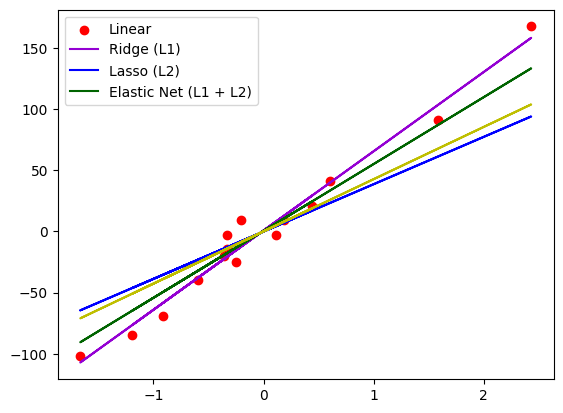

In [50]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x, y = make_regression(n_samples=15, n_features=1, random_state=5, noise=10)

linear_model = LinearRegression()
linear_model.fit(x, y)

ridge_regr = Ridge(alpha=10)
ridge_regr.fit(x, y)

lasso_regr = Lasso(alpha=10)
lasso_regr.fit(x, y)

en_regr = ElasticNet(alpha=1, l1_ratio=0.5)
en_regr.fit(x, y)

plt.scatter(x, y, color="r")
plt.plot(x, linear_model.predict(x), color="darkviolet")
plt.plot(x, ridge_regr.predict(x), color="blue")
plt.plot(x, lasso_regr.predict(x), color="darkgreen")
plt.plot(x, en_regr.predict(x), color="y")
plt.legend(["Linear", "Ridge (L1)", "Lasso (L2)", "Elastic Net (L1 + L2)"])
plt.show()